In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=7
paper='2008.08998'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's break down this problem step-by-step:

## QUESTION 1: Dimension and Basis Order

I need to understand the structure of the Hamiltonian to determine the dimensions and basis order.

From the Hamiltonian equation:
- We have creation/annihilation operators indexed by:
  - $s$ (spin, likely up/down)
  - $\bm{p}$ (crystal momentum in the folded BZ)
  - $\bm{q}$ (reciprocal lattice vectors: $\Gamma$, $K$, $K'$)

This suggests our basis has:
- Spin degrees of freedom (s): likely 2 values (up/down)
- Reciprocal lattice vectors (q): explicitly mentioned as 3 values ($\Gamma$, $K$, $K'$)

So the dimension tuple D would be (2, 3), representing (|spin|, |reciprocal_lattice_vector|).

The basis order would be:
0: spin. Order: up, down
1: reciprocal_lattice_vector. Order: $\Gamma$, $K$, $K'$

## QUESTION 2: Identifying Interacting Terms

First, I need to identify the expectation values (EXP-VAL DEPENDENT TERMS) in the Hamiltonian:

1. From $

In [7]:
print(generated_code['thinking'])

Let's break down this problem step-by-step:

## QUESTION 1: Dimension and Basis Order

I need to understand the structure of the Hamiltonian to determine the dimensions and basis order.

From the Hamiltonian equation:
- We have creation/annihilation operators indexed by:
  - $s$ (spin, likely up/down)
  - $\bm{p}$ (crystal momentum in the folded BZ)
  - $\bm{q}$ (reciprocal lattice vectors: $\Gamma$, $K$, $K'$)

This suggests our basis has:
- Spin degrees of freedom (s): likely 2 values (up/down)
- Reciprocal lattice vectors (q): explicitly mentioned as 3 values ($\Gamma$, $K$, $K'$)

So the dimension tuple D would be (2, 3), representing (|spin|, |reciprocal_lattice_vector|).

The basis order would be:
0: spin. Order: up, down
1: reciprocal_lattice_vector. Order: $\Gamma$, $K$, $K'$

## QUESTION 2: Identifying Interacting Terms

First, I need to identify the expectation values (EXP-VAL DEPENDENT TERMS) in the Hamiltonian:

1. From $H_{\text{Hartree}}$: $\langle c_{\bm{q}_\alpha,s}^\da

In [8]:
print(generated_code['text'])

# Analysis of Hamiltonian

## QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I can see operators indexed by:
- Spin (s): likely up and down (2 values)
- Reciprocal lattice vectors (q): explicitly mentioned as three high-symmetry points: Γ, K, K' (3 values)
- Crystal momentum (p): this is within the folded Brillouin zone (corresponds to k-points in our implementation)

Tuple of Flavors (D) = (2, 3) 
Basis Order:
0: spin. Order: up, down
1: reciprocal_lattice_vector. Order: Γ, K, K'

## QUESTION 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS: 
- `\langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\delta,s}(\bm{p}_\alpha) \rangle`: Average density for spin s and q-points α, δ
- `\langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\gamma,s'}(\bm{p}_\alpha) \rangle`: Average exchange between spin s, s' and q-points α, γ

TERMS:
- `-\sum_{s}\sum_{\bm{p},\bm{q}}\sum_{R_\bm{n}} t_{s}(\bm{n}) e^{-i (\bm{p}+\bm{q}) \cdot R_\bm{n}} c_{\bm{p}+\bm{q

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """
  Hartree-Fock Hamiltonian for a triangular lattice with spin and folded Brillouin zone.
  
  Args:
    N_shell (int): Number of shells in the first Brillouin zone.
    parameters (dict): Dictionary containing model parameters.
    filling_factor (float): Filling factor for the system, default is 0.5.
  """
  def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
    self.lattice = 'triangular'
    self.D = (2, 3)  # (|spin|, |reciprocal_lattice_vector|)
    self.basis_order = {'0': 'spin', '1': 'reciprocal_lattice_vector'}
    # Order for each flavor:
    # 0: spin up, spin down
    # 1: Gamma point, K point, K' point
    
    # Occupancy relevant parameters
    self.nu = filling_factor
    self.T = parameters.get('T', 0.0)  # temperature, default to 0
    self.a = parameters.get('a', 1.0)  # Lattice constant
    self.primitive_vectors = get_primitive_ve

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2008_08998_7.py


# Code evaluation

In [6]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [7]:
import importlib

In [8]:
module = importlib.import_module(code_path)

In [9]:
import HF

## Task 1: Check k-space

In [10]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

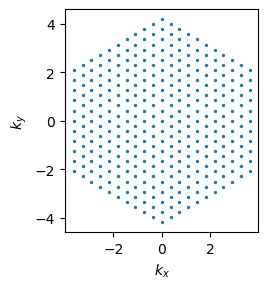

In [11]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [12]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [13]:
h_nonint = ham.generate_non_interacting()

In [14]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

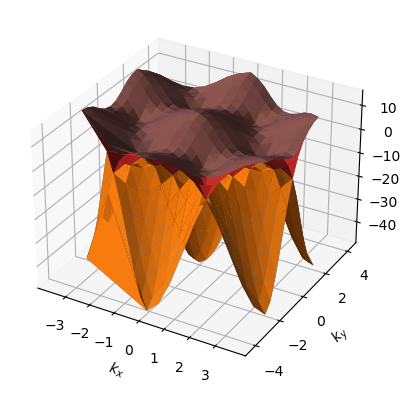

In [15]:
utils_auto.plot_2d_bandstructure(ham,en)

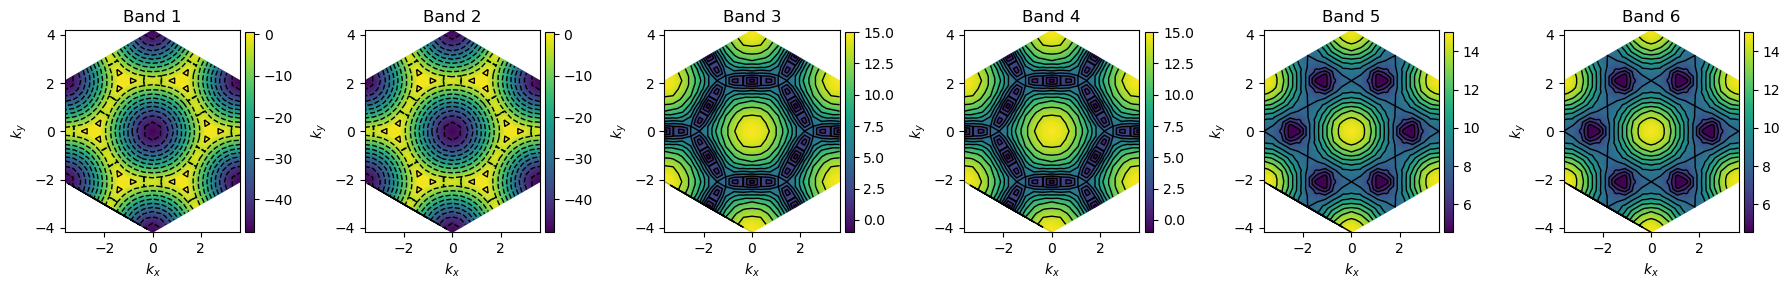

In [16]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [17]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e5},filling_factor=1/2)

In [18]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [19]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 1


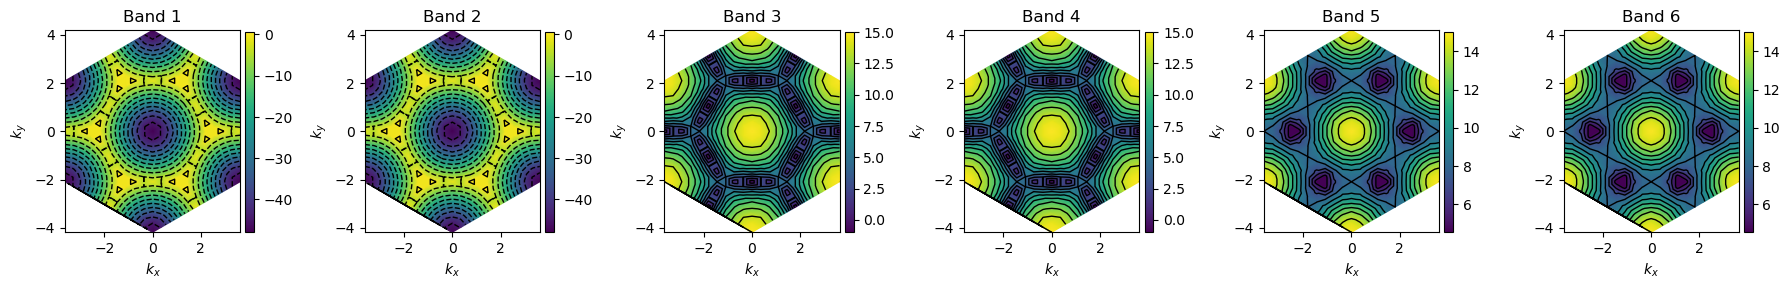

In [20]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [21]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e-2},filling_factor=1/2)


In [22]:
h_nonint=ham_int.generate_non_interacting()
for q in range(3):
    h_nonint[0,q,0,q,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [23]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 1


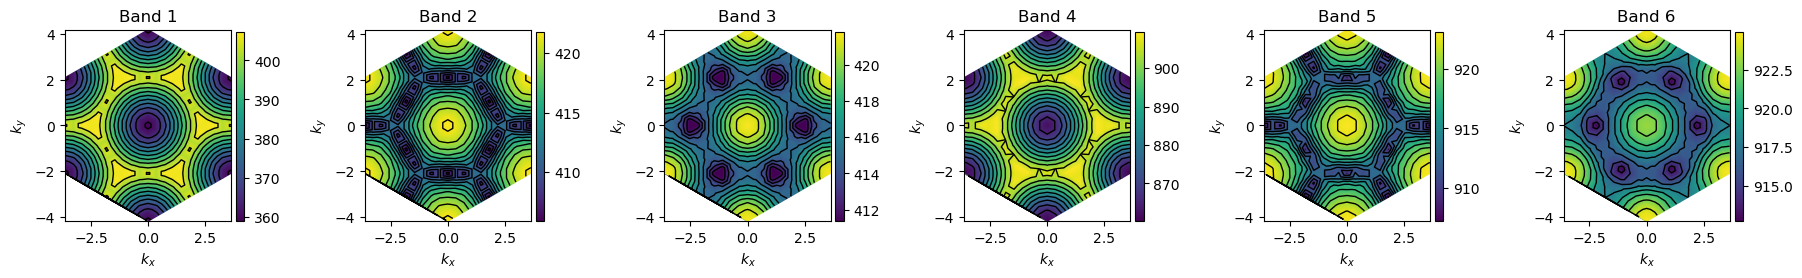

In [24]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [25]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is -10.47
U/T is 53.72
mean_U is 109.74


# Auto eval

## Task 1

In [26]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

I need to examine

 the image and check if it meets the criteria specified in the rubric. Let me analyze what's shown in the image.

The image shows a hexagonal grid of points in momentum (k) space, with k_x on the horizontal axis and k_y on the vertical axis. The axes range approximately from -4 to 4 in both directions. The points are arranged in a hexagonal pattern, which is consistent with the reciprocal lattice of a triangular lattice in real space.

Now, let me check each point in the rubric:

1. **This image should show momentum space mesh in the first Brillouin zone of the concerned problem.**
   
   The hexagonal arrangement of points in the image is consistent with the first Brillouin zone of a triangular lattice, which is mentioned in the problem statement. The problem describes a triangular lattice, and its Brillouin zone is expected to be hexagonal. So this aspect appears to be correct.

2. **You need to check the point group symmetry.**

   For a triangular lattice, the point group symmetry 

In [27]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [28]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let's analyze this
Let's analyze this image carefully according to the rubric provided. I'm looking at a series of band structure plots for a triangular lattice system using the Hartree-Fock method.

The image shows 6 different bands (labeled Band 1 through Band 6) plotted in the first Brillouin zone. Each plot shows the energy distribution as a function of crystal momentum (k_x and k_y).

Let me go through the rubric point by point:

1. Identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the plots, I can see that the Brillouin zone is depicted as a hexagon. This is indeed the correct shape for a triangular lattice in reciprocal space. The first Brillouin zone of a triangular lattice is hexagonal, so this matches expectations. The k_x and k_y axes are clearly labeled, and the hexagonal boundary is visible in all six plots.

2. Next, examine the symmetry of the

In [29]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [30]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Alright,
Alright, let's analyze this false color plot of the interacting-renormalized band structure in the first Brillouin zone based on the provided rubric.

1. Shape of the Brillouin zone boundary:
Looking at the plots, we can see that each subplot has a hexagonal shape, which is indeed the expected Brillouin zone shape for a triangular lattice. This is correct.

2. Symmetry of the energy distribution:

2.1 Highest energy regions (yellow):
- In Bands 1 and 2: The highest energy regions (yellow) appear at the corners of the hexagon and at points midway along the edges.
- In Bands 3-6: The highest energy regions are at the center (Γ point) and at the corners of the hexagon.

2.2 Energy variation pattern:
- Bands 1 and 2 show a pattern where energy decreases from the edges and corners toward the center.
- Bands 3-6 show energy decreasing from the center outward, with local minima (dark blue) appearing at specific points within the zo

In [31]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [32]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='U/epsilon_r=1000/1e-2=100000',nu=1/2)
    )


#################### THINKING ####################

Alright,
Alright, I'm presented with an image showing band structure plots in the first Brillouin zone for 6 different bands after a self-consistent Hartree-Fock calculation. I need to analyze these according to the given rubric and determine if they meet the expected criteria.

Let me go through the rubric step by step:

### 1. Brillouin zone shape
From the image, I can see that the Brillouin zone boundary appears hexagonal in shape, which is indeed what's expected for a triangular lattice. The first Brillouin zone of a triangular lattice should be a regular hexagon, and this is what we see in the plots.

### 2. Symmetry of the energy distribution

#### 2.1 Highest energy regions (yellow)
Looking at all bands, I can see that the highest energy regions (yellow) are distributed in specific patterns:
- For Band 1: Yellow regions are at the corners and mid-points of the edges of the hexagon
- For Band 2: Yellow regions are primarily at 

In [33]:
answer4=utils_auto.extract_result_content(result4['text'])

In [34]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '7' saved to final_answer.yaml
